In [1]:
import pymysql
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/home/lizimeng/python/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/lizimeng/python/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


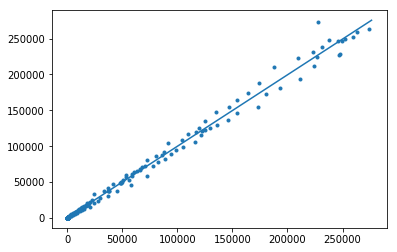

In [2]:
conn = pymysql.connect(host="127.0.0.1", user="root", password="19910501", db="market", charset="utf8")
cursor = conn.cursor()
cursor.execute("select distinct vari,deli from contract_daily where deli between '1401' and '1712'")
contracts = cursor.fetchall()

for vari,deli in contracts:
    cursor.execute("select settle,volume,oi from contract_daily where vari=%s and deli=%s order by day asc", (vari,deli))
    df = pd.DataFrame(list(cursor.fetchall()), columns=['settle','volume','oi'])
    for col in ['settle','volume','oi']:
        s = df[col].values
        # 线性回归 OLS
        ols = sm.OLS(s[1:], sm.add_constant(s[:-1]))
        r = ols.fit()
        b0,b1 = r.params
        R2 = r.rsquared
        # 最值
        _min = min(s) * 0.99
        _max = max(s) * 1.01
        # 绘制图像
        plt.clf()
        plt.scatter(s[:-1], s[1:], marker=".")
        plt.plot([_min, _max], [b0+b1*_min, b0+b1*_max])
        plt.savefig('./%s/%s_%s_%.2f_%.2f_%.2f.png' % (col, vari, deli, b0, b1, R2))

cursor.close()
conn.close()